# k-Armed Bandit Problem (Stationary)


---
<br>
<center><img src="https://conversionxl.com/wp-content/uploads/2015/09/multiarmedbandit.jpg">
<br>
</center>

<div class="alert alert-info">
In our first assignment, you will implement and analyze the different strategies (algorithms) to solve the k-Armed Bandit Problem presented in our corresponding lecture. The maximum number of points for each subtask is indicated next to the sections.

To accomplish this exercise read the notebook carefully from beginning to end end fill out to coding parts marked with **TODO**.
</div>

---

# Definition of the Problem
Problem Description:
- We repeat choosing among k different actions (options)
- After each action you receive a numeric reward (originating from a stationary probability distribution)
- Our objective: maximize expected total reward over time by concentrating on beneficial actions

The particular problem we are facing here is defined as follows:
- A set of 2000 randomly generated $10$-armed bandit problems
- The action values $q_*(a)$ are sampled from $\mathcal{N}(0,\,1)$
- The actual rewards $R_t$ are sampled from $\mathcal{N}(q_*(a),\,1)$

## Python Imports

As you will probably notice below we also explicitly import the packages numpy and matplotlib to directly access their functionality.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# set some colors for plots
cmap = ['m', 'b', 'g', 'k', 'orange', 'c']

# we set the number of choices to 10
N_ACTIONS = 10

# we also fix a seed for reproducing our results
np.random.seed(4711)

# interactive plotting "on"
plt.ion()

<div class="alert alert-info"> 

**Hints:**  These are some libraries and functions which will turn out to be very useful for this exercise:
<ul>
<li>numpy.random: https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.random.html</li>
<li>numpy.random.random()</li>
<li>numpy.random.choice()</li>
<li>numpy.argmax()</li>
<li>numpy.sum()</li>
<li>numpy.zeros()</li>
<li>numpy.arange</li>
</ul>
</div>

## Definition of k-Armed Bandit Problem
In this section we implement the actual bandit problem.

In [2]:
class kArmedBandit(object):
    """
    Specifies a k-armed bandit problem
    
    The agent has to choose from k different actions.
    Taking an action yields a numeric reward specified by a stationary probability distribution.
    """
    
    def __init__(self, k=10):
        """ Constructor """
        
        # sample action values from gaussian with mean 0 and standard deviation 1
        self.q_star = np.zeros(k)
        for a in range(k):
            self.q_star[a] = np.random.randn()
    
    def step(self, action):
        """
        Take one step following the given action.
        
        Parameters
        ----------
           @action: action id (integer in [0, k[)
        
        Returns
        -------
            the reward for taking this action.
        """
        Ri = self.q_star[action] + np.random.randn()
        return Ri
        

## Visualization of one problem instance
This section is just for visualizing the problem instances we are facing.
For this purpose we generate one instance of the problem and uniformly select actions to get a notion of the underlying stationary probability distribution.

<div class="alert alert-info"> 

**Hint:** If you would like to visualize the problem instance with the nice violin plots as in the lecture slides check out the python package **seaborn** (http://seaborn.pydata.org/examples/).
This is of course not mandatory. It's just good to know that this package exists.
</div>

In [3]:
# initialize bandit problem with N_ACTIONS actions
bandit_instance = kArmedBandit(k=N_ACTIONS)

In [4]:
# iterate actions and select each one 1000 times
action_rewards = np.zeros((N_ACTIONS, 1000))
for action in range(N_ACTIONS):
    
    # choose each action several times and recive reward
    # (this will hopefully reveal the underlying distribution)
    for i_step in range(action_rewards.shape[1]):
        r = bandit_instance.step(action)
        action_rewards[action, i_step] = r
    

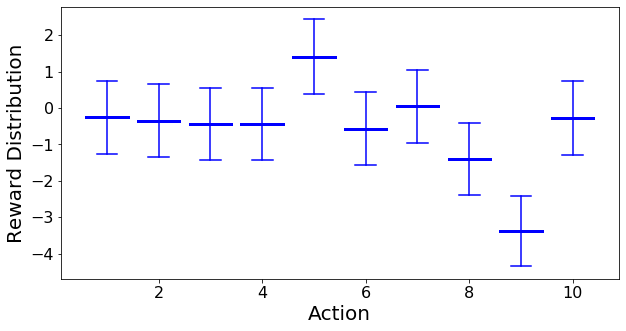

In [5]:
# vizualize problem instance

# compute means and standard deviations
means = action_rewards.mean(axis=1)
stds = action_rewards.std(axis=1)

plt.figure(figsize=(10, 5))
ax = plt.subplot(111)
for i in range(N_ACTIONS):
    plt.plot([i + 0.6, i + 1.4], 2 * [means[i]], 'b-', linewidth=3)
    plt.plot([i + 0.8, i + 1.2], 2 * [means[i] + stds[i]], 'b-', linewidth=1.5)
    plt.plot([i + 0.8, i + 1.2], 2 * [means[i] - stds[i]], 'b-', linewidth=1.5)
    plt.plot(2 * [i + 1], [means[i] - stds[i], means[i] + stds[i]], 'b-', linewidth=1.5)
plt.xlabel("Action", fontsize=20)
plt.ylabel("Reward Distribution", fontsize=20)
ax.tick_params(labelsize=16)
plt.show()

# Comparison of Standard Algorithms
Your task in this exercise is to compare the bandit algorithms listed below on our standard testbed e.g. the 10-armed bandit problem.
* Iterative Sample Average Method
* Greedy vs. epsilon-Greedy Action Selection
* Optimistic Initial Values
* Gradient Bandit Algorithms

## Random Action Selection Baseline
Implementation of a random action selection baseline. This should just serve as a template for you to implement the much more intelligent bandit algorithms below.

In [6]:
class RandomBaseline(object):
    """
    Random Action Selection
    
    Parameters
    ----------
        @k: number of possible actions (integer)
    """
    
    def __init__(self, k=10):
        """ Constructor """
        # number of possible actions
        self.k = k
    
    def choose_action(self):
        """ Action selection """
        # choose random action
        At = np.random.choice(self.k)
        return At
    
    def update_estimates(self, action, reward):
        """ update action value estimate """
        # nothing todo here
        pass

## Incremental Sample Average Method (5 points)
Implementation of the Sample Average Method. The algorithm is parametrized by the number of actions and a probability $\epsilon$ of picking a random action instead of following the policy.

In [7]:
class IncrementalSampleAverageMethod(object):
    """
    Incremental Implemenation of Sample Average Method
    
    Parameters
    ----------
        @k: number of possible actions (integer)
        @epsilon: probability for selecting a random action (float in [0, 1])
    """
    
    def __init__(self, k=10, epsilon=0.1):
        """ Constructor """
        self.k = k
        self.epsilon = epsilon
        self.n = 0
        self.action_count = np.zeros(k)
        self.average_reward = 0
        self.k_reward = np.zeros(k)
        pass
        
    def choose_action(self):
        p = np.random.rand()
        if p <= self.epsilon:
            return np.random.choice(self.k)
        else:
            return np.argmax(self.k_reward)
  
    
    def update_estimates(self, action, reward):
        """ update action value estimate """
        
        self.n += 1
        self.action_count[action] += 1
        self.average_reward += (reward - self.average_reward) / self.n
        self.k_reward[action] = self.k_reward[action] + (reward - self.k_reward[action]) / self.action_count[action]
        pass


## Optimistic Initial Values (2 points)
Change the Implementation of the Sample Average Method from above to use Optimistic Initial Values for exploration. The algorithm is parametrized by the number of actions and a set of initial values initialize the value estimates.
The latter is required for Optimistic Initial Values which allows to encourage exploration.

<div class="alert alert-info"> 

**Hint:** You can of course also include this initialization scheme as an additional parameter in the implementation of the Incremental Sample Average Method above.
</div>

In [8]:
class OptimisticInitialValues(IncrementalSampleAverageMethod):
    """means
    Incremental Implemenation of Optimisitc Initial Values
    
    Parameters
    ----------
        @k: number of possible actions (integer)
        @initial_value: initial action value estimate
         
    """
    
    def __init__(self, k=10, initial_value=0.0):
        """ Constructor """
        super(OptimisticInitialValues, self).__init__()        
        self.k_reward = np.repeat(5., k)

        pass

## Upper Confidence Bound Action Selection (3 points)
Implementation of the Upper Confidence Bound Action Selection. The algorithm is parametrized by the number of actions and a value $c > 0$ to control the degree of exploration.

<div class="alert alert-info"> 

**Hint:** In case you encounter a division by 0 error, take a closer look on your values for $t$ and $N_t(a)$.
Note that if $N_t(a) = 0$, then $a$ is considererd to be a maximizing action.
</div>

In [9]:
class UCB(object):
    """
    Incremental Implemenation of Upper Confidence Bound Action Selection
    
    Parameters
    ----------
        @k: number of possible actions (integer)
        @c: degree of exploration
    """
    
    def __init__(self, k=10, c=0):
        """ Constructor """
        self.k = k
        self.c = c
        self.n = 0  
        # Step count for each arm
        self.action_count = np.zeros(k)
        # Total mean reward
        self.average_reward = 0
        # Mean reward for each arm
        self.k_reward = np.zeros(k)
        pass

    
    def choose_action(self):
        """ Action selection """
        
        if self.n == 0:
            action = np.random.choice(self.k)
            return action
        
        else:
            UCB_est = self.k_reward + self.c * np.sqrt((np.log(self.n+1)) / self.action_count+0.1)
            action = np.argmax(UCB_est)
            return action 
            
    
    def update_estimates(self, action, reward):
        """ update action value estimate """
        self.n += 1
        self.action_count[action] += 1
        self.average_reward += (reward - self.average_reward) / self.n
        
        # Update results for a_k
        self.k_reward[action] = self.k_reward[action] + (reward - self.k_reward[action]) / self.action_count[action]
        pass
        

## Gradient Bandit Algorithm (5 points)
Implementation of the Gradient Bandit Algorithm. The algorithm is parametrized by the number of actions and step size $\alpha$.

In [10]:
class GradientBandit(object):
    """
    Gradient Bandit Method
    
    Parameters
    ----------
        @k: number of possible actions (integer)
        @alpha: step-size parameter (float)
    """
    
    def __init__(self, k=10, alpha=0.1):
        """ Constructor """
        self.k = k
        self.alpha = alpha
        self.n = 0  
        self.action_count = np.zeros(k)
        self.average_reward = 0
        self.k_reward = np.zeros(k)
        self.k_n = np.ones(k)
        self.H = np.zeros(k)
        pass
    
    def softmax(self):
        self.prob_action = np.exp(self.H - np.max(self.H)) \
            / np.sum(np.exp(self.H - np.max(self.H)), axis=0)
                            
    def choose_action(self):
        """ Action selection """
        self.softmax()
        # Select highest preference action
        action = np.random.choice(self.k, p=self.prob_action)
        return action
    
    def update_estimates(self, action, reward):
        """ update action selection preferences """
        self.n += 1
        self.action_count[action] += 1
        self.average_reward += (reward - self.average_reward) / self.n
        
        # Update results for a_k
        self.k_reward[action] = self.k_reward[action] + (reward - self.k_reward[action]) / self.action_count[action]
                            
        self.H[action] = self.H[action] + self.alpha * (reward - self.average_reward) * (1 - self.prob_action[action])
        
        actions_not_taken = self.k!=action
        self.H[actions_not_taken] = self.H[actions_not_taken] - self.alpha * (reward - self.average_reward) * self.prob_action[actions_not_taken]
            
        pass


## Experiments
In the following we will actually test our implementations on a set of real bandit problems.
For comparing the methods we will create similar *time step vs. reward plots* as the ones shown in the lecture slides.

<div class="alert alert-info"> 

**Hints:** If you have not worked with **matplotlib** yet then this is a list of useful functions for you:
<ul>
<li>matplotlib.pyplot.figure()</li>
<li>matplotlib.pyplot.subplot()</li>
<li>matplotlib.pyplot.plot()</li>
<li>matplotlib.pyplot.legend()</li>
<li>matplotlib.pyplot.ylabel()</li>
<li>matplotlib.pyplot.xlabel()</li>
<li>matplotlib.pyplot.title()</li>
<li>matplotlib.pyplot.show()</li>
</ul>

<br>
And here you can find the documentation: https://matplotlib.org/api/pyplot_api.html
</div>

### Experimental setup: run n_runs different instances of the k-armed bandit problem for n_steps steps.
Convenience function for carrying out the experiments.

In [11]:
def run_experiments(n_runs=1000, n_steps=1000, method=RandomBaseline, **kwargs):
    """
    Run experiments following the policy of the provided agent
    
    @n_runs: number of different bandit problems (integer)
    @n_steps: number of steps taken in each individual problem (integer)
    @method: one of the bandit algorithms from above
    @**kwargs: arguments of given method
    
    Some Examples:
    run_experiments(n_runs=1000, n_steps=1000, method=RandomBaseline)
    run_experiments(method=IncrementalSampleAverageMethod, epsilon=0.0)
    run_experiments(n_runs=100, n_steps=1000, method=IncrementalSampleAverageMethod, epsilon=0.0)
    
    returns an array of rewards with shape (n_runs, n_steps)
    where element (i,j) contains the reward of step j in ith run.
    """
    
    print("running %s" % method.__name__ + str(kwargs))
    
    # initialize results
    rewards = np.zeros((n_runs, n_steps))

    # perform multiple runs
    for run in range(n_runs):
        
        # initialize agent
        agent = method(k=N_ACTIONS, **kwargs)
        
        # get new instance of problem
        bandit_instance = kArmedBandit(k=N_ACTIONS)
        
        # get best action value for current instance
        best_action_value = bandit_instance.q_star[np.argmax(bandit_instance.q_star)]

        # perform multiple steps on problem instance
        for step in range(n_steps):

            # pick action
            action = agent.choose_action()

            # take action and receive reward
            reward = bandit_instance.step(action)
            
            # compute percentage with respect to best action
            perc_of_opt = 100.0 * reward / best_action_value

            # update agent
            agent.update_estimates(action, reward)

            
            # book keeping
            rewards[run, step] = reward
    
    print("done!")
    return rewards

### Random Action Selection
Lets see how well our random action selection baseline performs.

In [12]:
# run experiments
rewards_random = run_experiments(method=RandomBaseline)

running RandomBaseline{}
done!


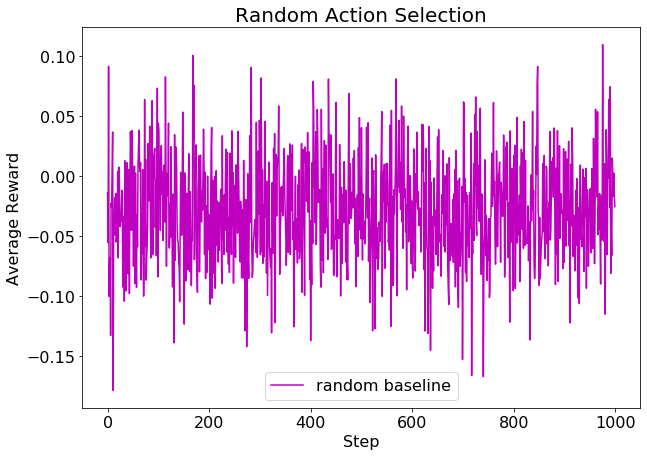

In [13]:
# visualize results
plt.figure(figsize=(10, 7))
ax = plt.subplot(111)
plt.plot(rewards_random.mean(0), '-', color=cmap[0], label='random baseline')
plt.legend(loc='best', fontsize=16)
plt.ylabel("Average Reward", fontsize=16)
plt.xlabel("Step", fontsize=16)
plt.title("Random Action Selection", fontsize=20)
ax.tick_params(labelsize=16)
plt.show()

### Greedy vs. $\epsilon$-Greedy (4 points)
In our first experiment we will explore the influence of the random action selection probability $\epsilon$ on the evolution of the reward we get.

For this purpose
- First run the *IncrementalSampleAverageMethod* three times with $\epsilon \in \{0.0, 0.01, 0.1\}$
- and compare their performance in one plot.
- Briefly describe your observations.
- Which method will perform best in the long run in terms of cumulative reward and cumulative probability of selecting the best action? How much better will it be? Express your answer quantitatively.

In [15]:
# run experiments

rewards_incre_0 = run_experiments(method=IncrementalSampleAverageMethod)    # epsilon =0.0

running IncrementalSampleAverageMethod{}
done!


In [17]:
rewards_incre_001 = run_experiments(method=IncrementalSampleAverageMethod) # epsilon =0.01

running IncrementalSampleAverageMethod{}
done!


In [19]:
rewards_incre_1 = run_experiments(method=IncrementalSampleAverageMethod)  # epsilon =0.1

running IncrementalSampleAverageMethod{}
done!


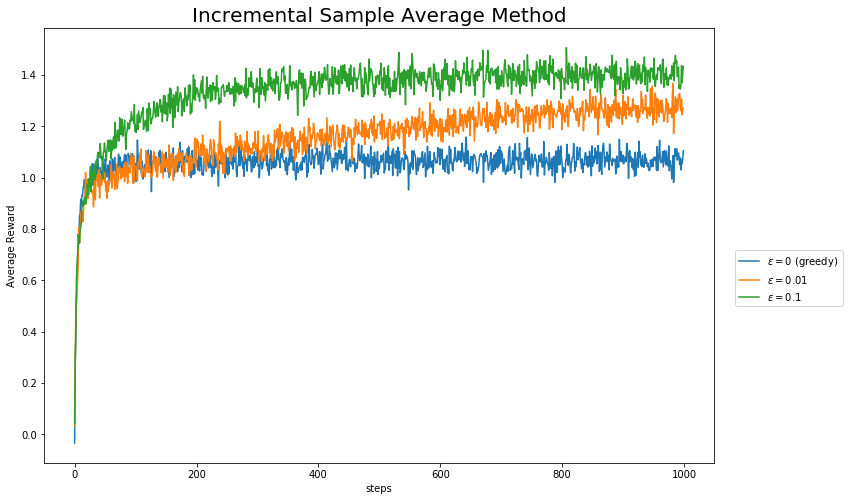

In [20]:
# visualize results

plt.figure(figsize=(12,8))
plt.plot(rewards_incre_0.mean(0), label="$\epsilon=0$ (greedy)")
plt.plot(rewards_incre_001.mean(0), label="$\epsilon=0.01$")
plt.plot(rewards_incre_1.mean(0), label="$\epsilon=0.1$")
plt.legend(bbox_to_anchor=(1.2, 0.5))
plt.xlabel("steps")
plt.ylabel("Average Reward")
plt.title("Incremental Sample Average Method", fontsize=20)
ax.tick_params(labelsize=16)
plt.show()


This graph is an outcome of the comparison for three different eplisons with using incremental sample average method. Based on the result of this graph, $\epsilon=0.1$ performs the best among the three different $epsilon$ settings. This algorithm with $\epsilon=0.1$ increased its average reward to around 1.4 and then represents its covergence at around 1.4 after 400 steps. 
For $\epsilon=0.01$, it represents a pattern of constant increasing until the end of "steps" in this experiment. Hence, it cannot be determined that this algorithm with $\epsilon=0.01$ has been converged during this experiment. It may be need more steps to perform to find out a possible convergent point for $\epsilon=0.01$.
Lastly, $\epsilon=0.0$ represent the lowest performance based average reward compared to other two settings in this experiment. $\epsilon=0.0$ has converged to around 1.0 as soon as its experiment has been performed.


In [57]:
import pandas as pd
n_steps=1000
k=10


In [58]:
eps_0_selection = np.zeros(k)
eps_01_selection = np.zeros(k)
eps_1_selection = np.zeros(k)

In [59]:
mean_incre_1 = rewards_incre_0.mean(1)
mean_incre_2 = rewards_incre_001.mean(1)
mean_incre_3 = rewards_incre_1.mean(1)

In [60]:
# Average actions per episode
for i in range(n_steps):
    eps_0_selection = eps_0_selection + (mean_incre_1[i] - eps_0_selection) / (i + 1)
    eps_01_selection = eps_01_selection + (mean_incre_2[i] - eps_01_selection) / (i + 1)
    eps_1_selection = eps_1_selection + (mean_incre_3[i] - eps_1_selection) / (i + 1)

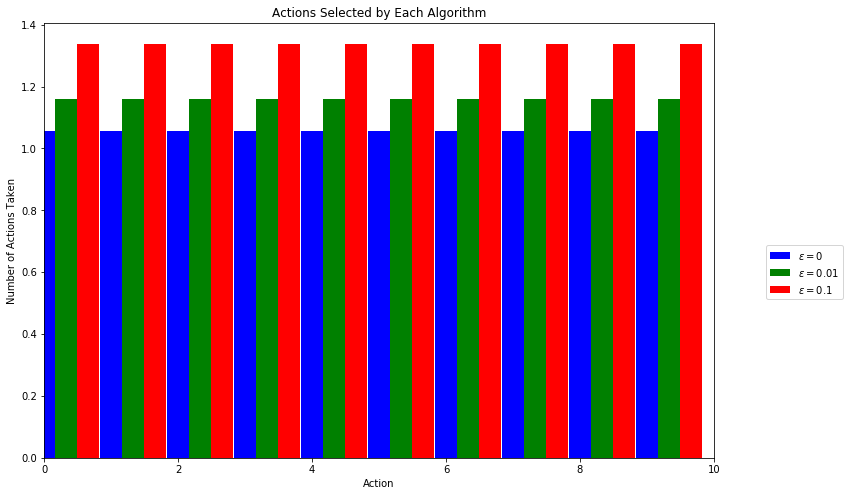

Percentage of actions selected:


,a = 0,a = 1,a = 2,a = 3,a = 4,a = 5,a = 6,a = 7,a = 8,a = 9
$\epsilon=0$,0.105745,0.105745,0.105745,0.105745,0.105745,0.105745,0.105745,0.105745,0.105745,0.105745
$\epsilon=0.01$,0.116103,0.116103,0.116103,0.116103,0.116103,0.116103,0.116103,0.116103,0.116103,0.116103
$\epsilon=0.1$,0.133872,0.133872,0.133872,0.133872,0.133872,0.133872,0.133872,0.133872,0.133872,0.133872


In [61]:
plt.figure(figsize=(12,8))
plt.bar(bins, eps_0_selection, 
        width = 0.33, color='b', 
        label="$\epsilon=0$")
plt.bar(bins+0.33, eps_01_selection,
        width=0.33, color='g', 
        label="$\epsilon=0.01$")
plt.bar(bins+0.66, eps_1_selection, 
        width=0.33, color='r',
        label="$\epsilon=0.1$")
plt.legend(bbox_to_anchor=(1.2, 0.5))
plt.xlim([0,k])
plt.title("Actions Selected by Each Algorithm")
plt.xlabel("Action")
plt.ylabel("Number of Actions Taken")
plt.show()

opt_per = np.array([eps_0_selection, eps_01_selection,eps_1_selection]) / n_steps * 100
df = pd.DataFrame(opt_per, index=['$\epsilon=0$', '$\epsilon=0.01$', '$\epsilon=0.1$'],
                 columns=["a = " + str(x) for x in range(0, k)])
print("Percentage of actions selected:")
df

### Greedy vs. Optimistic Initial Values (2 points)
In our second experiment we evaluate the performance of another approach to enforce exploration, namely Optimistic Initial Values.

For this purpose
- Run *OptimisticInitialValues* with an initial value of 5.0 for all actions.
- and compare its performance with the *IncrementalSampleAverageMethod* and $\epsilon=0.0$.
- Briefly describe and explain your observations.

In [216]:
# run experiments
rewards_opt_initial = run_experiments(method=OptimisticInitialValues)  

running OptimisticInitialValues{}
done!


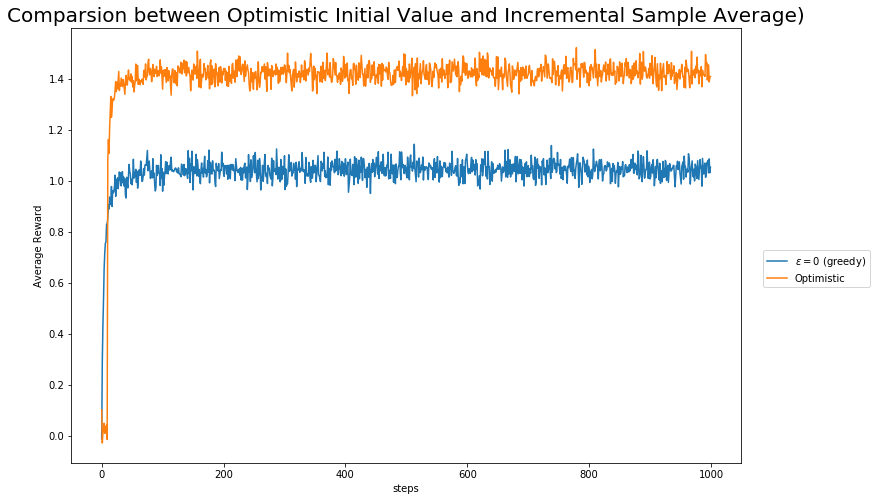

In [221]:
# visualize results
plt.figure(figsize=(12,8))
plt.plot(rewards_incre_0.mean(0), label="$\epsilon=0$ (greedy)")
plt.plot(rewards_opt_initial.mean(0), label="Optimistic")
plt.legend(bbox_to_anchor=(1.2, 0.5))
plt.xlabel("steps")
plt.ylabel("Average Reward")
plt.title("Comparsion between Optimistic Initial Value and Incremental Sample Average)", fontsize=20)
ax.tick_params(labelsize=16)
plt.show()


Obviously, the algorithm of optmistic initial value outperforms the comparison method. At the very beginnig steps, the optimistic initial value method represents worse than the compared method. The reason is that we set up highly overestimated the rewards of all actions. Hence, the optimistic initial value method explored for some early steps to seek additional information which is true reward value. 


### $\epsilon$-Greedy vs Upper Confidence Bound Action Selection (2 points)
In our next experiment we compare $\epsilon$-greedy action selection with the *UCB* action selection algorithm.

For this purpose
- Run the *UCB* action selection algorithm with exploration parameter $c=2$
- and compare its performance with the *IncrementalSampleAverageMethod* and $\epsilon=0.1$.
- Briefly describe and explain your observations.

In [45]:
class UCB(object):
    """
    Incremental Implemenation of Upper Confidence Bound Action Selection
    
    Parameters
    ----------
        @k: number of possible actions (integer)
        @c: degree of exploration
    """
    
    def __init__(self, k=10, c=2):
        """ Constructor """
        self.k = k
        self.c = c
        self.n = 0  
        self.action_count = np.zeros(k)
        self.average_reward = 0
        self.k_reward = np.zeros(k)
        pass

    
    def choose_action(self):
        """ Action selection """
        
        if self.n == 0:
            action = np.random.choice(self.k)
            return action
        
        else:
            UCB_est = self.k_reward + self.c * np.sqrt((np.log(self.n+1)) / self.action_count+0.5)
            q_best = np.max(UCB_est)
            action = np.argmax(UCB_est)
            action = np.random.choice(np.where(UCB_est == q_best)[0])
            return action 
            
    
    def update_estimates(self, action, reward):
        """ update action value estimate """
        self.n += 1
        self.action_count[action] += 1
        self.average_reward += (reward - self.average_reward) / self.n
        
        # Update results for a_k
        self.k_reward[action] = self.k_reward[action] + (reward - self.k_reward[action]) / self.action_count[action]
        pass

In [46]:
# run experiments
rewards_UCB_2 = run_experiments(method=UCB)  

running UCB{}


C:\Users\J. Park\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in true_divide


done!


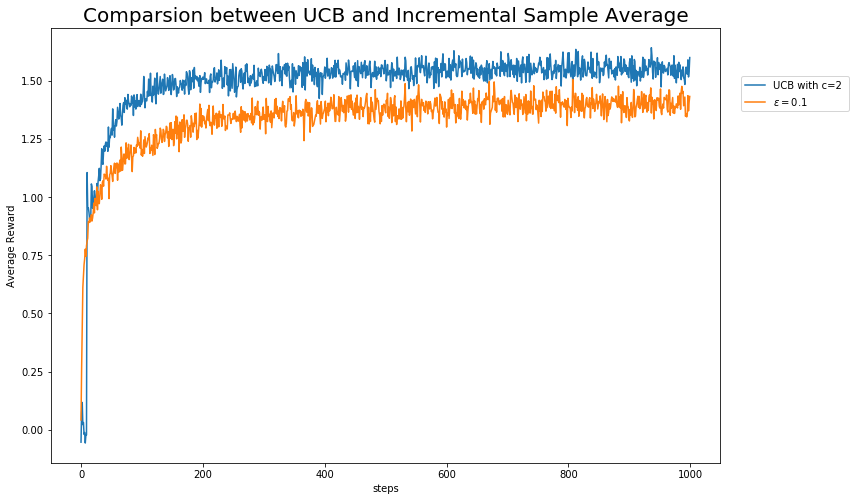

In [47]:
# visualize results
plt.figure(figsize=(12,8))
plt.plot(rewards_UCB_2.mean(0), label="UCB with c=2 ")
plt.plot(rewards_incre_1.mean(0), label="$\epsilon=0.1$")
plt.legend(bbox_to_anchor=(1.2, 0.9) )
plt.xlabel("steps")
plt.ylabel("Average Reward")
plt.title("Comparsion between UCB and Incremental Sample Average", fontsize=20)
ax.tick_params(labelsize=16)
plt.show()

To be compared the result of two methods, the Upper-Cofidence-Bound methods performs slightly better than another method in this experiment. However, there is no significant difference identified from the graph. Otherwise, a noticeable pattern has beend identified for the method of UCB. In the early steps of this experiment, the UCB methods represents huge variation and then it remains relative smaller variation later. The reason is that the UCB method is designed to explore the action space based on its uncertainty.

### $\epsilon$-Greedy vs Gradient Bandit (2 points)
In our last experiment we compare $\epsilon$-greedy action selection with the *GradientBandit* algorithm.

For this purpose
- Run the *GradientBandit* algorithm with step sizes $\alpha=0.01$ and $0.1$.
- and compare its performance with the *IncrementalSampleAverageMethod* and $\epsilon=0.1$.
- Briefly describe and explain your observations.

In [238]:
# run experiments
rewards_gradient_001 = run_experiments(method=GradientBandit)  # step-size =0.01

running GradientBandit{}
done!


In [240]:
rewards_gradient_01 = run_experiments(method=GradientBandit)  # step-size =0.1

running GradientBandit{}
done!


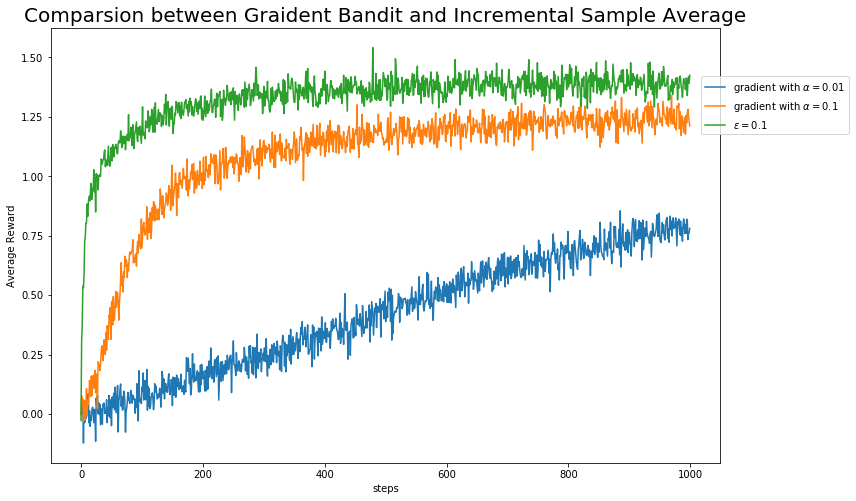

In [253]:
# visualize results
plt.figure(figsize=(12,8))
plt.plot(rewards_gradient_001.mean(0), label="gradient with " "$\\alpha=0.01$")
plt.plot(rewards_gradient_01.mean(0), label="gradient with "  "$\\alpha=0.1$")
plt.plot(rewards_incre_1.mean(0), label="$\epsilon=0.1$")
plt.legend(bbox_to_anchor=(1.2, 0.9) )
plt.xlabel("steps")
plt.ylabel("Average Reward")
plt.title("Comparsion between Graident Bandit and Incremental Sample Average", fontsize=20)
ax.tick_params(labelsize=16)
plt.show()

Based on the result of the above graph, both gradient bandit methods underperformed for all steps compared to the e-greedy ($\epsilon=0.1$). Esepcailly, gradient method with rate size (0.01) shows that it need relatively a lot of time/steps to convergent it. Instead of updating the average the rewards, gradient bandit method makes an update the value of H(t,a) which is able to select higher preference actions to be selected more often. The preference, the value of H(t,a), will be updated by stochastic gradient ascent.



# Bonus Exercise (Exercise 2.3 in the book, 5 bonus points)
Design and conduct an experiment to demonstrate
the difficulties that sample-average methods have for non-stationary problems. Use a
modified version of the 10-armed testbed in which all the $q^∗(a)$ start out equal and
then take independent random walks. Prepare plots like Figure 2.2 for an action-
value method using sample averages, incrementally computed by $\alpha=\frac{1}{n}$, and another
action-value method using a constant step-size parameter, $\alpha=0.1$.
Use $\epsilon=0.1$ and, if necessary, runs longer than 1000 plays. (exercise taken from book)

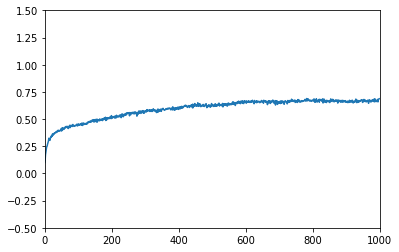

In [27]:
import numpy as np
import matplotlib.pyplot as plt


def create_bandits(n, mean=0, std=1, b_std=1):
    bandits = []

    for i in range(n):
        bandits.append([np.random.normal(mean, std), b_std])

    return bandits


def bandit_random_walk(bandits, shift):
    for bandit in bandits:
        bandit[0] += shift if np.random.uniform() < 0.5 else -shift
    return bandits


def main():
    num_bandits = 10
    episodes = 1000
    alpha = 0.1
    epsilon = 0.1
    shift = 0.01

    merge_choices_num = 1
    reruns = 1000

    merged_choices = []

    for h in range(reruns):
        correct_choices = []

        bandits = create_bandits(num_bandits)
        max_bandit = 0
        best_bandit = 0
        for i in range(len(bandits)):
            if bandits[i][0] > max_bandit:
                max_bandit = bandits[i][0]
                best_bandit = i

        q = np.zeros(num_bandits)
        n = np.zeros(num_bandits)

        for i in range(episodes):
            bandit_random_walk(bandits, shift)    # Random walk by shift amount

            selected_bandit = np.argmax(q)

            if np.random.uniform() < epsilon:
                selected_bandit = np.random.choice(len(q))

            reward = np.random.normal(bandits[selected_bandit][0], bandits[selected_bandit][1])

            n[selected_bandit] += 1

            # q[selected_bandit] += (reward - q[selected_bandit]) / n[selected_bandit]    # Sample Average
            # alpha = 1/(i + 1)  # Variable alpha
            q[selected_bandit] += alpha * (reward - q[selected_bandit])   # Using alpha

            correct_choices.append(int(selected_bandit == best_bandit))

            if i <= merge_choices_num:
                merged_choice = sum(correct_choices)/len(correct_choices)
            else:
                merged_choice = sum(correct_choices[-merge_choices_num:])/merge_choices_num

            if h == 0:
                merged_choices.append(merged_choice)
            else:
                merged_choices[i] += (merged_choice - merged_choices[i]) / (h + 1)

    plt.axis([0, episodes, -0.5, 1.5])
    plt.plot(range(episodes), merged_choices)
    plt.show()


if __name__ == "__main__":
    main()